In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import streamlit as st

In [2]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


In [15]:
url = "https://www.amazon.com/dp/B01H6GUCCQ/ref=sspa_dk_detail_1?psc=1&pd_rd_i=B01H6GUCCQ&pd_rd_w=Ryp70&content-id=amzn1.sym.386c274b-4bfe-4421-9052-a1a56db557ab&pf_rd_p=386c274b-4bfe-4421-9052-a1a56db557ab&pf_rd_r=7S4JN2J8XRB457MVFEZ6&pd_rd_wg=dTdGG&pd_rd_r=284831c3-a186-4b0e-8f27-59bf3b749656&s=electronics&sp_csd=d2lkZ2V0TmFtZT1zcF9kZXRhaWxfdGhlbWF0aWM"

In [16]:
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*review-text-content.*')
results = soup.find_all('div', {'class': regex})
reviews = [result.text for result in results]
reviews


["\nI got this in a rush when I needed a new headset. In hindsight a bit more research would have had me getting something else. As a precursor to the review I feel that it is worth noting that I am very rough on audio peripherals. I don't know why, but they usually last me about 6 months regardless of the quality and price. This is why I choose to buy at a cheaper price point more frequently rather than high-end less frequently.Pros:Price for the quality is greatDecent speaker/mic soundGood quality cable that is at least 6' longSits comfortably on the headStereo/mic to separate stereo and mic connector includedIn-line mic mute switch and audio volume adjustmentCons:The USB is only a power source for the blue lights on the headset (it is a bit misleading in its uses, but if I had researched it a bit more I would have found this out before purchase)The in-line mute and volume knob would be better with a mic gain knob as wellIt tends to make my head a bit sweaty (I have long hair and liv

In [17]:
pt=  r'\n(.*?)\n'

extracted_texts = []

# Loop through each string in the list
for text in reviews:
    matches = re.findall(pt,text)
    # Add the matches to the extracted_texts list
    extracted_texts.extend(matches)

print(extracted_texts[1])

As an avid gamer who values both performance and comfort, finding the right gaming headset can make or break the gaming experience. Enter the BENGOO Gaming Headsetâ€”a true contender that has exceeded my expectations in every aspect.Let's start with the most crucial aspect for any gaming headset: sound quality. The BENGOO Gaming Headset delivers immersive, crystal-clear audio that transports you straight into the heart of the action. Whether you're traversing the battlefield in a first-person shooter or immersing yourself in the atmospheric world of a role-playing game, every sound is rendered with remarkable clarity and precision, allowing you to hear even the faintest footsteps of your adversaries.Comfort is another standout feature of the BENGOO Gaming Headset. With its ergonomic design and plush, memory foam ear cushions, it provides hours of gaming comfort without causing discomfort or fatigue. The adjustable headband ensures a perfect fit for heads of all sizes, while the lightwe

In [18]:
df = pd.DataFrame(np.array(extracted_texts), columns=['review'])
df,df.shape

(                                               review
 0   I got this in a rush when I needed a new heads...
 1   As an avid gamer who values both performance a...
 2   These are both the best and worst of gaming he...
 3   My package arrived on time and undamaged. The ...
 4   Honestly these are really good. They are very ...
 5   The headphones work pretty good but to have th...
 6   This product is everythingIt is easy to use, h...
 7   Decent headset, good microphone.  Didn't have ...
 8                             Great bye for the price
 9   Das Bengoo G9000 Stereo Gaming Headset bietet ...
 10  Acquisto fatto per mio figlio che le considera...
 11  Son comodos, no apretan, se escucha muy bien! ...
 12                                            parfait,
 (13, 1))

In [19]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [20]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))
df

,review,sentiment
0,I got this in a rush when I needed a new heads...,3
1,As an avid gamer who values both performance a...,5
2,These are both the best and worst of gaming he...,2
3,My package arrived on time and undamaged. The ...,4
4,Honestly these are really good. They are very ...,5
5,The headphones work pretty good but to have th...,3
6,"This product is everythingIt is easy to use, h...",5
7,"Decent headset, good microphone. Didn't have ...",4
8,Great bye for the price,5
9,Das Bengoo G9000 Stereo Gaming Headset bietet ...,5


In [22]:
df['review'].iloc[2]

'These are both the best and worst of gaming headphones. I have bought a lot of headphones over the years and these have the best sound quality for gaming I have experienced - even on a budget. Great balance of bass and treble - nice great frequency range and sensitivity. You will get both the bass in music but also hear light footsteps.I am actually on my 3rd set if these headphones. The headphones seem to last for sound output. But the mic ALWAYS breaks. My last one broke after a few months of usage. Not sure why it is but it is always the Mic that goes.But if you are reading this and are a minority, you know how toxic the gaming community is. Give W/M anonymity and freedom from restraint and itâ€™s gonna get ugly.  Muting everyone and having a broken mic can be healthy too. Just kinda sucks when playing with RL friends.'

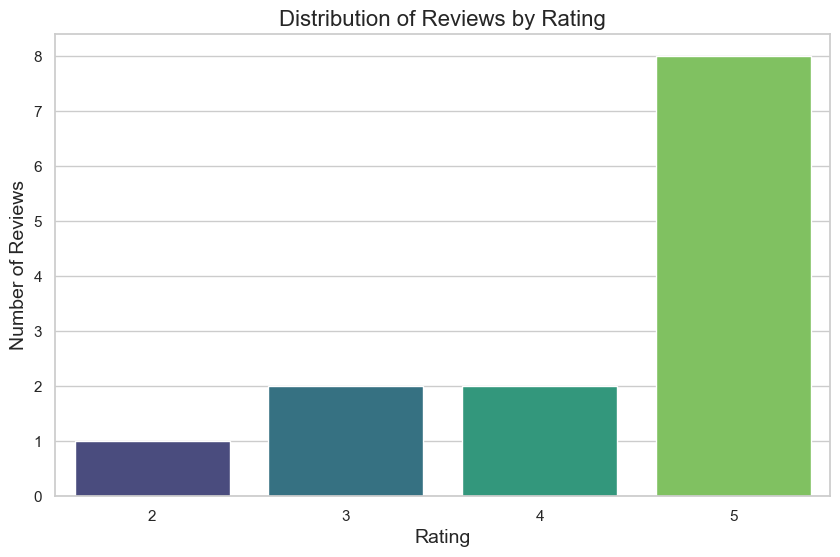

In [23]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')

# Add title and labels
plt.title('Distribution of Reviews by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

# Show the plot
plt.show()